In [5]:
import cv2               as cv
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import urllib
import random
import os
import glob
import shutil
import visualkeras
from imutils               import paths
from sklearn.utils         import shuffle
from urllib.request        import urlopen
from sklearn.decomposition import PCA
from IPython.display       import Image
from tqdm                  import tqdm
from PIL                   import Image
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models              import Sequential, load_model
from tensorflow.keras.preprocessing       import image
from tensorflow.keras.utils               import to_categorical, plot_model
from tensorflow.keras.callbacks           import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers              import Conv2D,Flatten,MaxPooling2D,Dense,Dropout,SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img,array_to_img
from keras.layers                         import BatchNormalization, GlobalAveragePooling2D

# 1-) Data Peparation

Data Preprocessing + Data Augmentation

In [6]:
folder_path        = "Dataset"
target_size        = (300,225)
labels_sea_animals = {"Clams"          :0,
                      "Corals"         :1,
                      "Crabs"          :2,
                      "Dolphin"        :3,
                      "Eel"            :4,
                      "Fish"           :5,
                      "Jelly_Fish"     :6,
                      "Lobster"        :7,
                      "Nudibranchs"    :8,
                      "Octopus"        :9,
                      "Otter"          :10,
                      "Penguin"        :11,
                      "Puffers"        :12,
                      "Sea_Rays"       :13,
                      "Sea_Urchins"    :14,
                      "Seahorse"       :15,
                      "Seal"           :16,
                      "Sharks"         :17,
                      "Shrimp"         :18,
                      "Squid"          :19,
                      "Starfish"       :20,
                      "Turtle_Tortoise":21,
                      "Whale"          :22}

In [7]:
#Data
for class_name in os.listdir(folder_path):
    print("Number of " , class_name , " is " , len(os.listdir(os.path.join(folder_path, class_name))))

Number of  Clams  is  497
Number of  Corals  is  500
Number of  Crabs  is  499
Number of  Dolphin  is  782
Number of  Eel  is  497
Number of  Fish  is  494
Number of  Jelly_Fish  is  845
Number of  Lobster  is  499
Number of  Nudibranchs  is  500
Number of  Octopus  is  562
Number of  Otter  is  500
Number of  Penguin  is  482
Number of  Puffers  is  531
Number of  Seahorse  is  478
Number of  Seal  is  414
Number of  Sea_Rays  is  517
Number of  Sea_Urchins  is  579
Number of  Sharks  is  590
Number of  Shrimp  is  488
Number of  Squid  is  483
Number of  Starfish  is  499
Number of  Turtle_Tortoise  is  1903
Number of  Whale  is  572


In [8]:
#Examine Data

def print_data(class_name, dataset, numOfImages=4):
    class_dir=os.path.join(dataset, class_name)
    images = os.listdir(class_dir)[:numOfImages]
    plt.figure(figsize=(15,30))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_dir, img_name)
        img=Image.open(img_path)
        plt.subplot(1, numOfImages, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)
    plt.show()

0


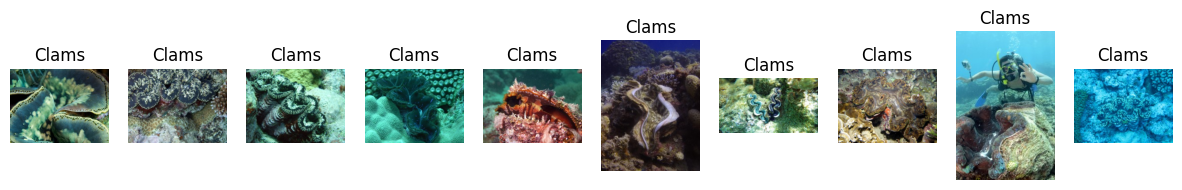

1


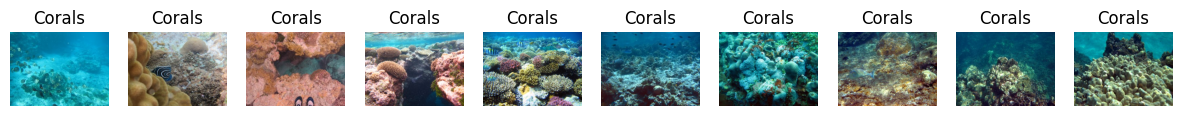

2


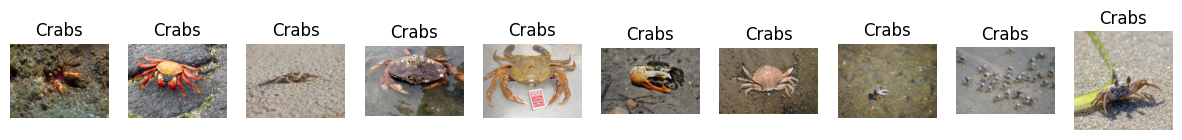

3


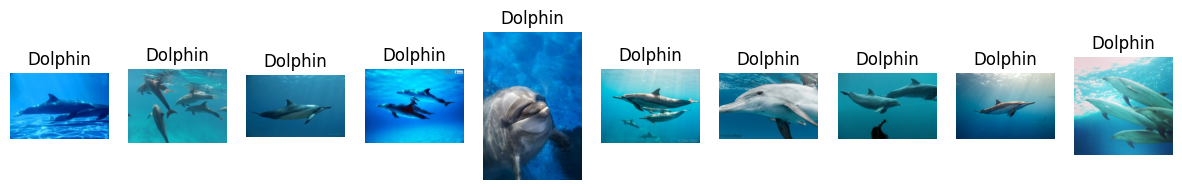

4


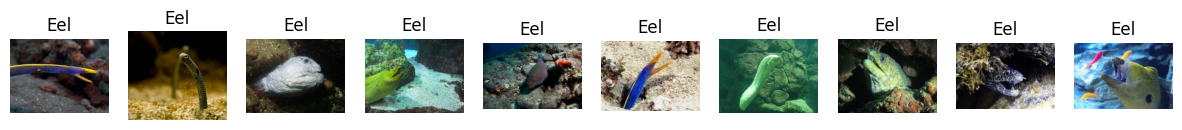

5


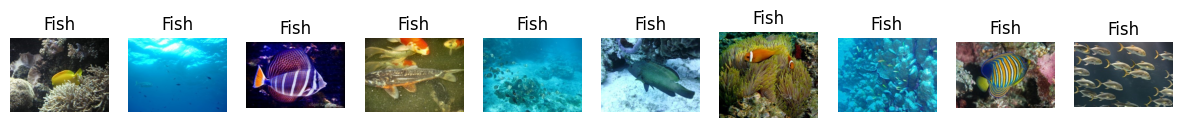

6


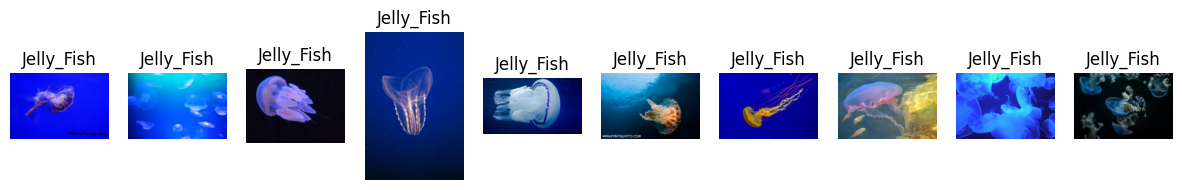

7


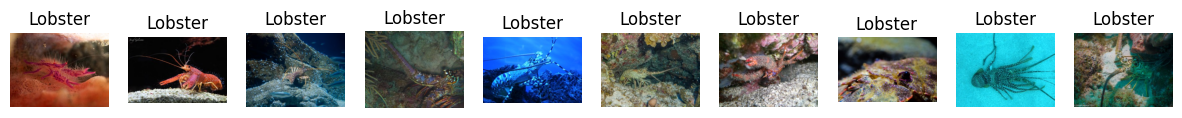

8


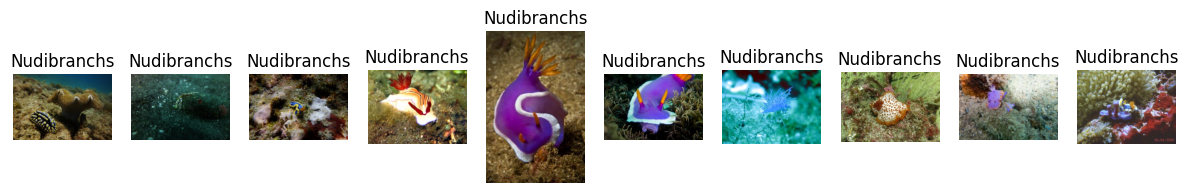

9


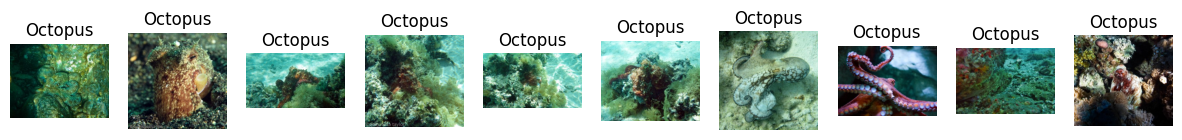

10


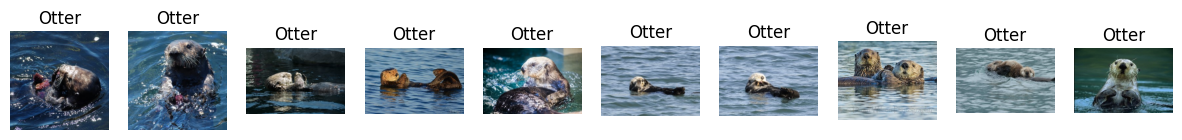

11


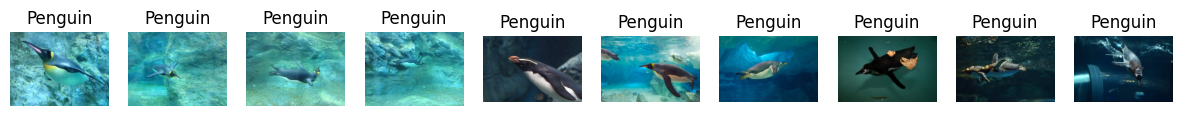

12


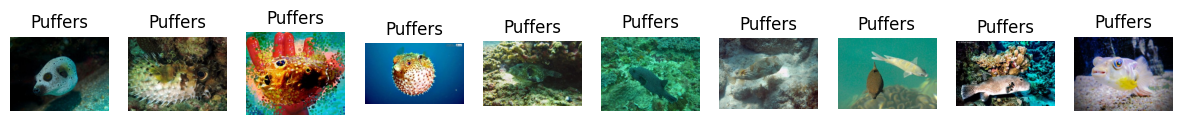

13


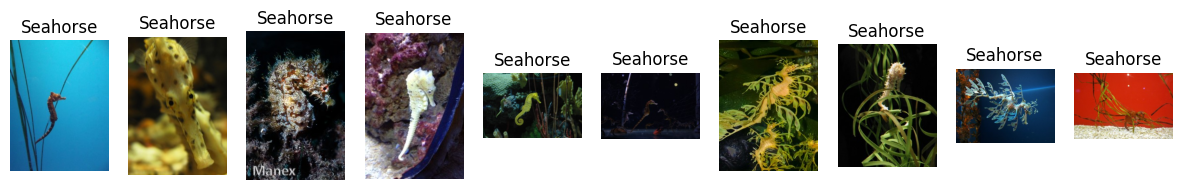

14


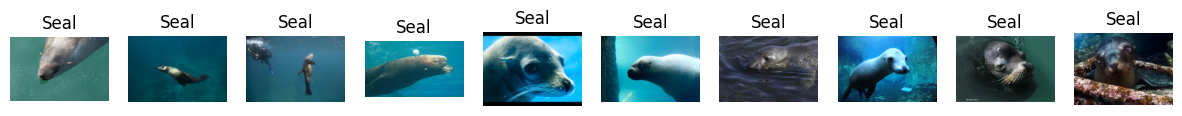

15


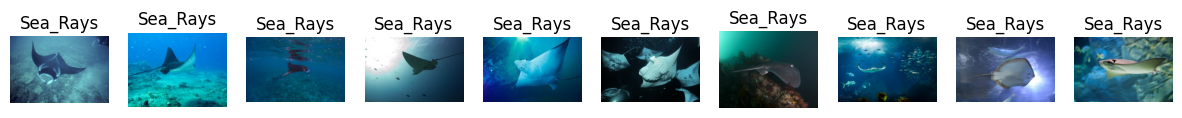

16


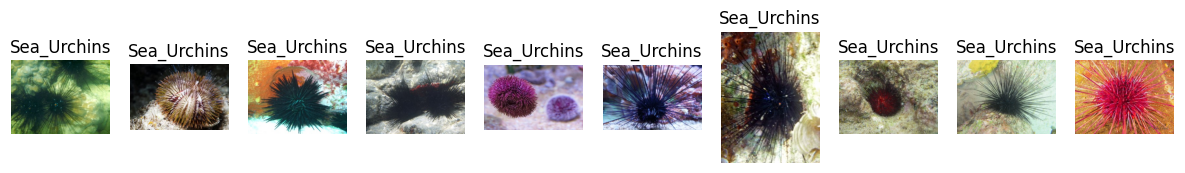

17


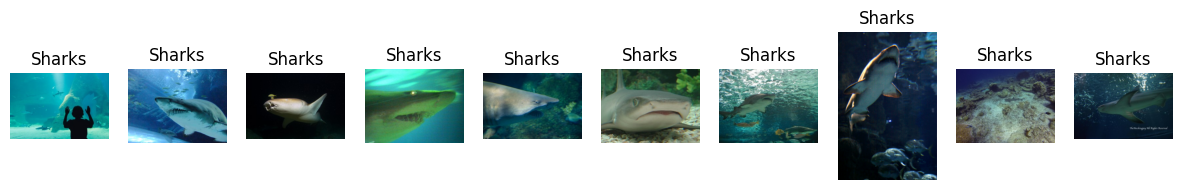

18


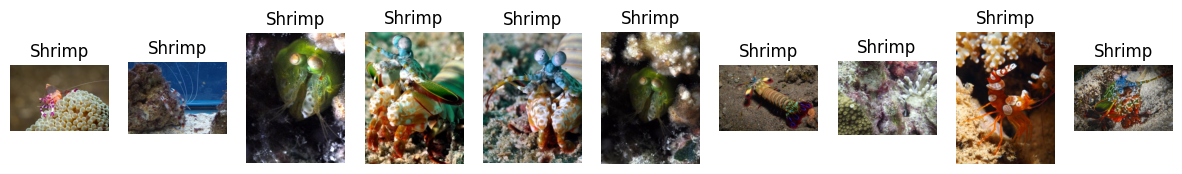

19


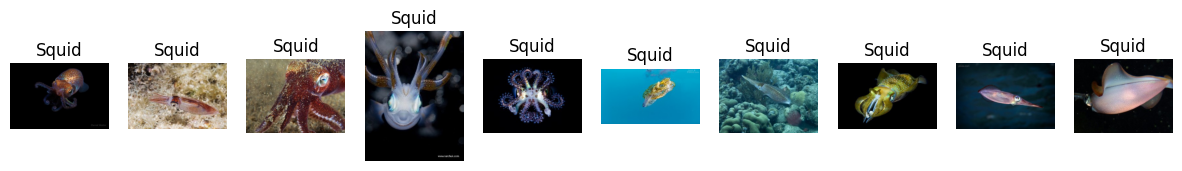

20


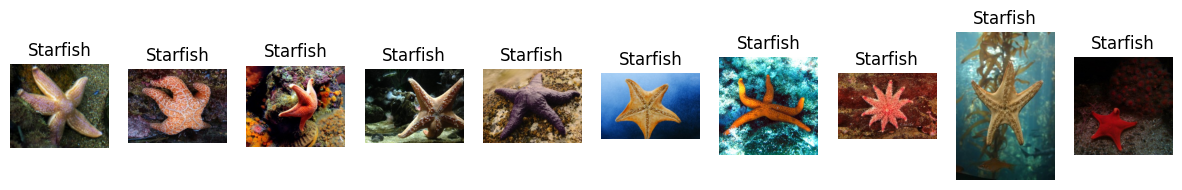

21


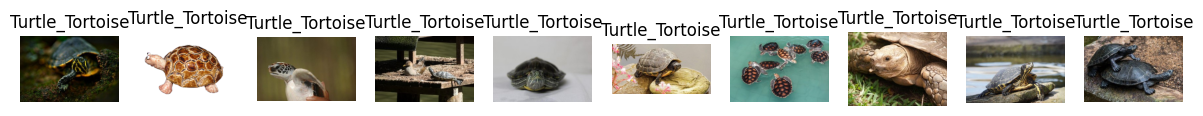

22


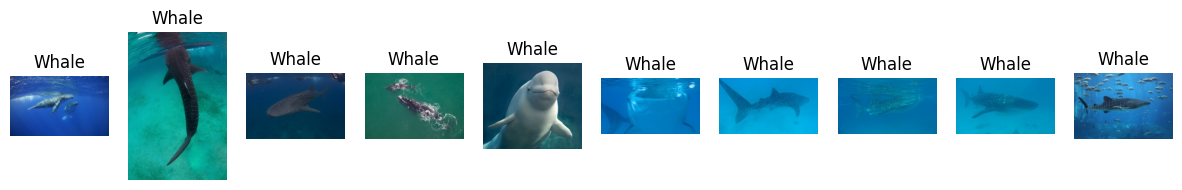

In [15]:
class_no = 0
for class_name in os.listdir(folder_path):
    print(class_no)
    print_data(class_name, folder_path, numOfImages=10)
    class_no+=1

In [10]:
#Load Data Function
def load_data_from_directory(directory, target_size, labels_mapping):
    images = []
    labels = []

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        for img_name in os.listdir(class_path):
            img_path  = os.path.join(class_path, img_name)
            img       = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(labels_mapping[class_name])
    return np.array(images), np.array(labels)

In [11]:
#Load Data
x_data, y_data = load_data_from_directory(directory=folder_path,
                                          target_size=target_size,
                                          labels_mapping=labels_sea_animals)
#Train-Validation-Test Split 70%-15%-15%
X_train, X_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.3, random_state=42) # 70% train, 30% temp
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 15% validaton, 15% test